In [195]:
import itertools

import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import seaborn as sns
import astropy.io.fits as pyfits
import re
import ctypes
import glob
import pandas as pd

%matplotlib inline

In [167]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];

full_dict = {};

str_idx = 27;
skip = 30

direct = '.'
for files in glob.iglob(direct + '/VIDYA_FINAL_RUN39_0*.fits'):
    
    dF = pd.DataFrame(columns=columns_name)
    print files
    hdulist = pyfits.open(files);
    fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
    bonds = np.array( hdulist['HoppingBonds'].data )
    
    str_idx = 27;
    skip = 30;
    if (fraction == 0.35):
        str_idx += 1;
        skip += 1;
        
    for x in range(str_idx, str_idx+20):
        #print x
        if (x != skip):
            
            para_susc = np.array(hdulist[x].data)
            
            para_xx = np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
            para_yy = np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))
            para_xy = np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
            
            dF.loc[len(dF)] = [hdulist[x].header['HIERARCH PIPELINE CGS OMEGA'], np.real(para_xx), np.imag(para_xx), 
                               np.real(para_yy), np.imag(para_yy), np.real(para_xy), np.imag(para_xy)]
    hdulist.close();
            
    
    full_dict.update({fraction: dF})
    
    

./VIDYA_FINAL_RUN39_0246_30VF_r.fits
./VIDYA_FINAL_RUN39_0262_40VF_r.fits
./VIDYA_FINAL_RUN39_0335_35VF_r.fits
./VIDYA_FINAL_RUN39_0287_15VF_r.fits
./VIDYA_FINAL_RUN39_0224_20VF_r.fits
./VIDYA_FINAL_RUN39_0271_25VF_r.fits
./VIDYA_FINAL_RUN39_0328_35VF_r.fits


In [168]:
data_Frame_Para = pd.concat(full_dict);

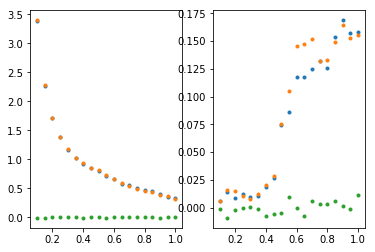

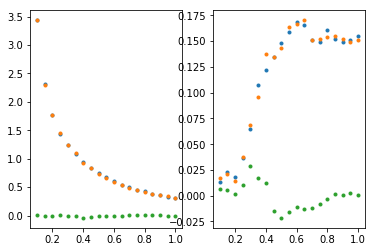

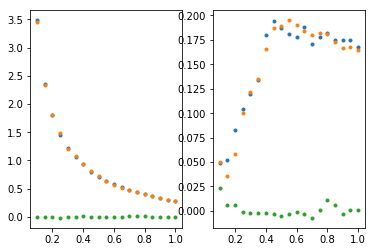

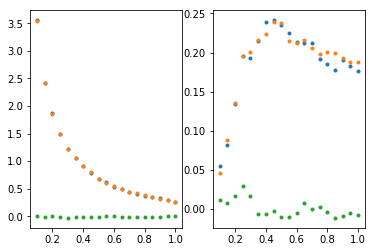

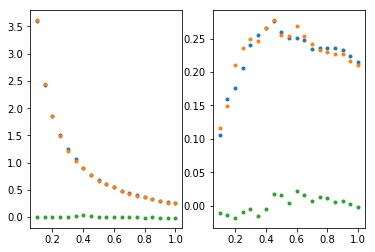

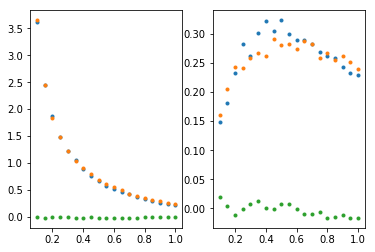

In [169]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];

index = data_Frame_Para.index.get_level_values(0)
index = index.tolist()
index = sorted(list(set(index)))

for indice in index:
    f, (ax1, ax2) = plt.subplots(1, 2)
    omega = data_Frame_Para.loc[indice][columns_name[0]]
    
    para_xx_real = data_Frame_Para.loc[indice][columns_name[1]]
    para_xx_imag = data_Frame_Para.loc[indice][columns_name[2]]
    
    para_yy_real = data_Frame_Para.loc[indice][columns_name[3]]
    para_yy_imag = data_Frame_Para.loc[indice][columns_name[4]]
    
    para_xy_real = data_Frame_Para.loc[indice][columns_name[5]]
    para_xy_imag = data_Frame_Para.loc[indice][columns_name[6]]
    
    ax1.plot(omega, para_xx_real / omega, '.')
    ax1.plot(omega, para_yy_real / omega, '.')
    ax1.plot(omega, para_xy_real / omega, '.')
    
    ax2.plot(omega, para_xx_imag / omega, '.')
    ax2.plot(omega, para_yy_imag / omega, '.')
    ax2.plot(omega, para_xy_imag / omega, '.')

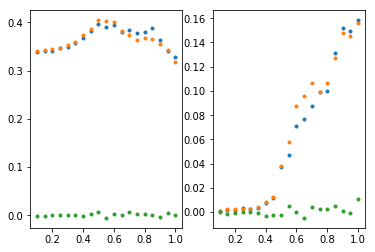

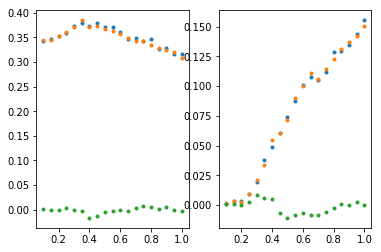

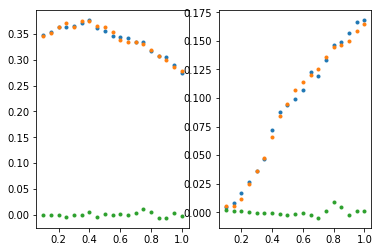

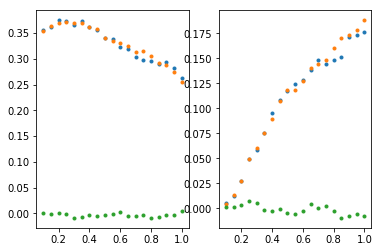

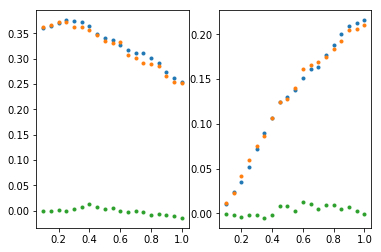

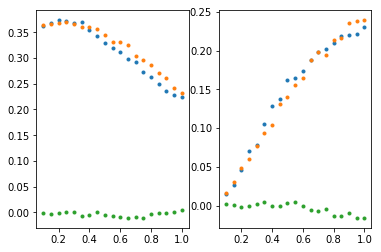

In [188]:
index = data_Frame_Para.index.get_level_values(0)
index = index.tolist()
index = sorted(list(set(index)))

for indice in index:
    f, (ax1, ax2) = plt.subplots(1, 2)
    omega = data_Frame_Para.loc[indice][columns_name[0]]
    
    para_xx_real = data_Frame_Para.loc[indice][columns_name[1]]
    para_xx_imag = data_Frame_Para.loc[indice][columns_name[2]]
    
    para_yy_real = data_Frame_Para.loc[indice][columns_name[3]]
    para_yy_imag = data_Frame_Para.loc[indice][columns_name[4]]
    
    para_xy_real = data_Frame_Para.loc[indice][columns_name[5]]
    para_xy_imag = data_Frame_Para.loc[indice][columns_name[6]]
    
    ax1.plot(omega, para_xx_real, '.')
    ax1.plot(omega, para_yy_real, '.')
    ax1.plot(omega, para_xy_real, '.')
    
    ax2.plot(omega, para_xx_imag, '.')
    ax2.plot(omega, para_yy_imag, '.')
    ax2.plot(omega, para_xy_imag, '.')

In [159]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];

full_dict = {};

direct = '.'
for files in glob.iglob(direct + '/DisHB_*.fits'):
    
    dF = pd.DataFrame(columns=columns_name)
    print files
    hdulist = pyfits.open(files);
    fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
    bonds = np.array( hdulist['HoppingBonds'].data )
    
    str_idx = 24;
    #skip = 30;
    if (fraction >= 0.35):
        str_idx += 1;
        skip += 1;
        
    for x in range(str_idx, str_idx+10):
        #print x
        if (x != skip):
            
            para_susc = np.array(hdulist[x].data)
            
            para_xx = np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
            para_yy = np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))
            para_xy = np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
            
            dF.loc[len(dF)] = [hdulist[x].header['HIERARCH PIPELINE CGS OMEGA'], np.real(para_xx), np.imag(para_xx), 
                               np.real(para_yy), np.imag(para_yy), np.real(para_xy), np.imag(para_xy)]
    hdulist.close();
            
    
    full_dict.update({fraction: dF})

./DisHB_RUN1_0002.fits
./DisHB_RUN1_0147.fits
./DisHB_RUN1_0055.fits
./DisHB_RUN1_0110.fits
./DisHB_RUN1_0188.fits


In [161]:
data_Frame_Para_nonint = pd.concat(full_dict);

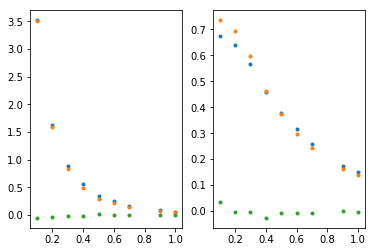

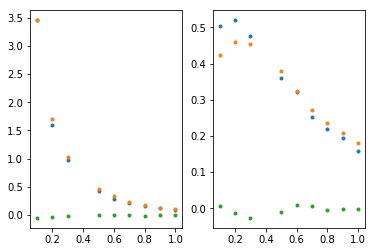

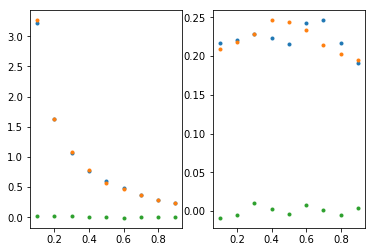

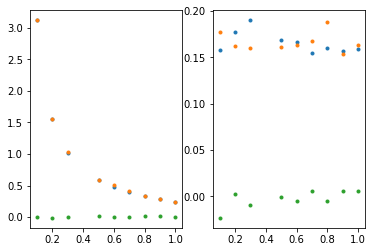

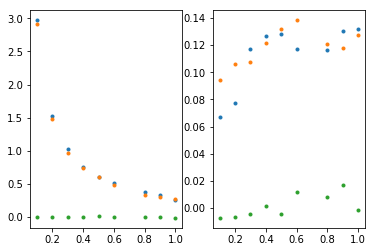

In [192]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];

index = data_Frame_Para_nonint.index.get_level_values(0)
index = index.tolist()
index = sorted(list(set(index)))

for indice in index:
    f, (ax1, ax2) = plt.subplots(1, 2)
    omega = data_Frame_Para_nonint.loc[indice][columns_name[0]]
    
    para_xx_real = data_Frame_Para_nonint.loc[indice][columns_name[1]]
    para_xx_imag = data_Frame_Para_nonint.loc[indice][columns_name[2]]
    
    para_yy_real = data_Frame_Para_nonint.loc[indice][columns_name[3]]
    para_yy_imag = data_Frame_Para_nonint.loc[indice][columns_name[4]]
    
    para_xy_real = data_Frame_Para_nonint.loc[indice][columns_name[5]]
    para_xy_imag = data_Frame_Para_nonint.loc[indice][columns_name[6]]
    
    ax1.plot(omega, para_xx_real / omega, '.')
    ax1.plot(omega, para_yy_real / omega, '.')
    ax1.plot(omega, para_xy_real / omega, '.')
    
    ax2.plot(omega, para_xx_imag / omega, '.')
    ax2.plot(omega, para_yy_imag / omega, '.')
    ax2.plot(omega, para_xy_imag / omega, '.')

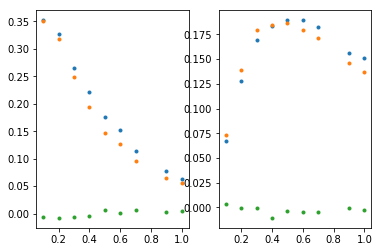

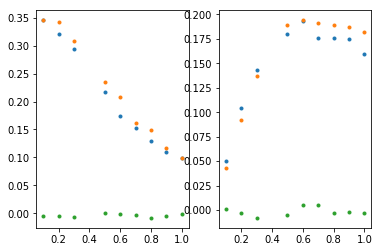

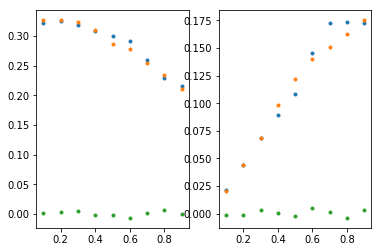

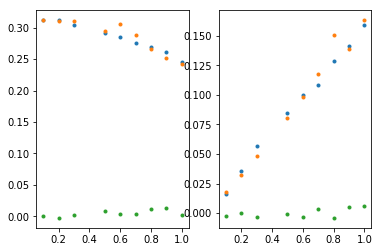

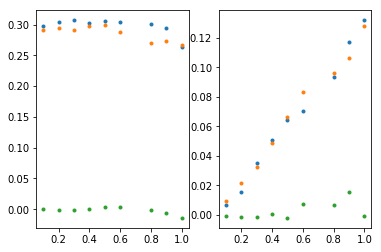

In [194]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];

index = data_Frame_Para_nonint.index.get_level_values(0)
index = index.tolist()
index = sorted(list(set(index)))

for indice in index:
    f, (ax1, ax2) = plt.subplots(1, 2)
    omega = data_Frame_Para_nonint.loc[indice][columns_name[0]]
    
    para_xx_real = data_Frame_Para_nonint.loc[indice][columns_name[1]]
    para_xx_imag = data_Frame_Para_nonint.loc[indice][columns_name[2]]
    
    para_yy_real = data_Frame_Para_nonint.loc[indice][columns_name[3]]
    para_yy_imag = data_Frame_Para_nonint.loc[indice][columns_name[4]]
    
    para_xy_real = data_Frame_Para_nonint.loc[indice][columns_name[5]]
    para_xy_imag = data_Frame_Para_nonint.loc[indice][columns_name[6]]
    
    ax1.plot(omega, para_xx_real, '.')
    ax1.plot(omega, para_yy_real, '.')
    ax1.plot(omega, para_xy_real, '.')
    
    ax2.plot(omega, para_xx_imag, '.')
    ax2.plot(omega, para_yy_imag, '.')
    ax2.plot(omega, para_xy_imag, '.')

In [171]:
out = data_Frame_Para_nonint.to_json()
with open('paraCond_nonint.json', 'w') as f:
    f.write(out)
f.close()

In [173]:
index = data_Frame_Para_nonint.index.get_level_values(0)
index = index.tolist()
index = sorted(list(set(index)))

In [196]:
cd ~/Desktop/DisHB_disint_Cond/

/Users/Sazbo/Desktop/DisHB_disint_Cond


In [ ]:
columns_name = ['OMEGA', 'Para_Susc_XX_Real','Para_Susc_XX_Imag', 'Para_Susc_YY_Real','Para_Susc_YY_Imag', 'Para_Susc_XY_Real','Para_Susc_XY_Imag'];

full_dict = {};

str_idx = 27;
skip = 30

direct = '.'
for files in glob.iglob(direct + '/VIDYA_FINAL_RUN39_0*.fits'):
    
    dF = pd.DataFrame(columns=columns_name)
    print files
    hdulist = pyfits.open(files);
    fraction = hdulist[0].header['HIERARCH HUBBARD MODEL V FRACTION'];
    bonds = np.array( hdulist['HoppingBonds'].data )
    
    str_idx = 27;
    skip = 30;
    if (fraction == 0.35):
        str_idx += 1;
        skip += 1;
        
    for x in range(str_idx, str_idx+20):
        #print x
        if (x != skip):
            
            para_susc = np.array(hdulist[x].data)
            
            para_xx = np.sum(bonds['DisplacementX'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
            para_yy = np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityYUp'] + para_susc['ParamagneticSusceptibilityYDn']))
            para_xy = np.sum(bonds['DisplacementY'] * (para_susc['ParamagneticSusceptibilityXUp'] + para_susc['ParamagneticSusceptibilityXDn']))
            
            dF.loc[len(dF)] = [hdulist[x].header['HIERARCH PIPELINE CGS OMEGA'], np.real(para_xx), np.imag(para_xx), 
                               np.real(para_yy), np.imag(para_yy), np.real(para_xy), np.imag(para_xy)]
    hdulist.close();
            
    
    full_dict.update({fraction: dF})